In [13]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [24]:
#load the data
airbnb = pd.read_csv('../../01_materials/notebooks/dataset/listings.csv')
airbnb.head()

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,13188.0,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,13358.0,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,13490.0,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,14267.0,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,16254.0,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36


In [15]:
airbnb['price'].mean()

249.16526273565984

In [22]:
# with random seed
np.random.seed(100)
airbnb.sample(n=40)['price'].mean()

222.875

In [23]:
# without random seed
airbnb.sample(n=40)['price'].mean()

315.25

In [34]:
np.random.seed(100)
sample_list = []
for i in range(20_000):
    sample = airbnb.sample(n=40)['price'].mean()
    sample_list.append(sample)
samples = pd.Series(sample_list)
samples


0        222.875
1        315.250
2        191.000
3        232.400
4        243.025
          ...   
19995    213.600
19996    192.525
19997    265.250
19998    248.900
19999    283.475
Length: 20000, dtype: float64

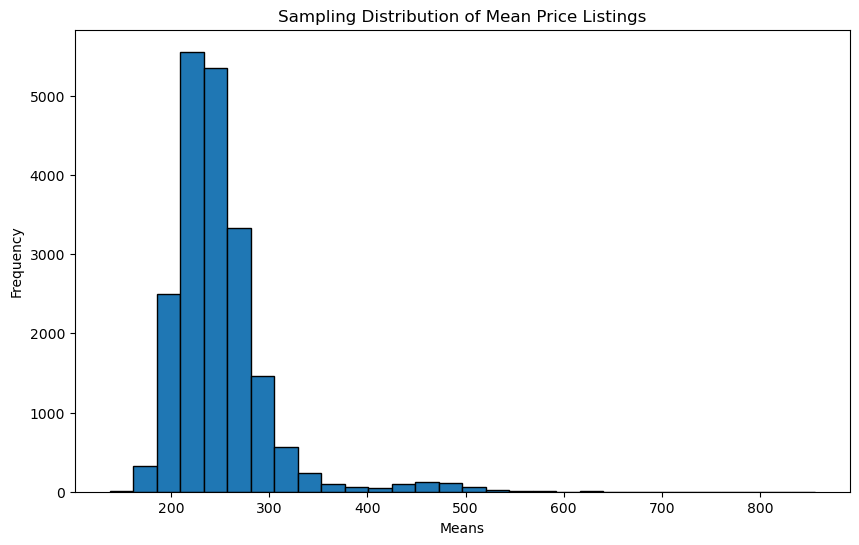

In [38]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [40]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
one_sample['price'].mean()

219.85

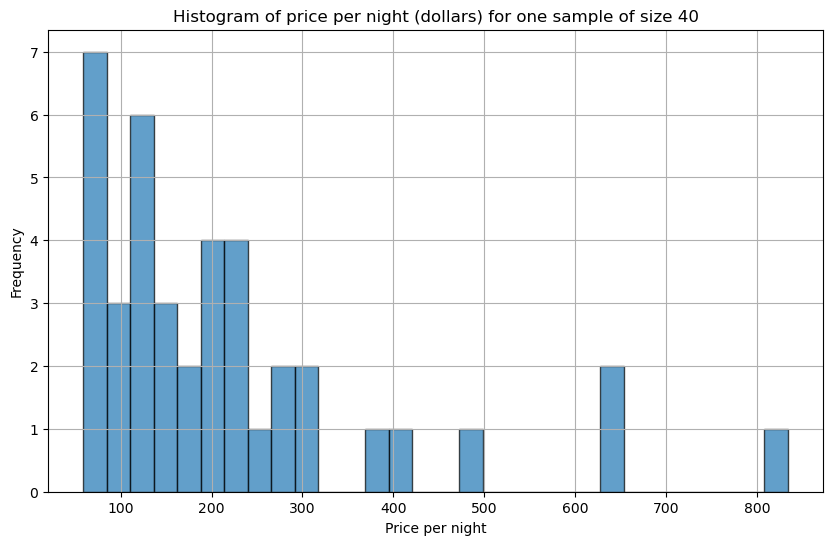

In [42]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

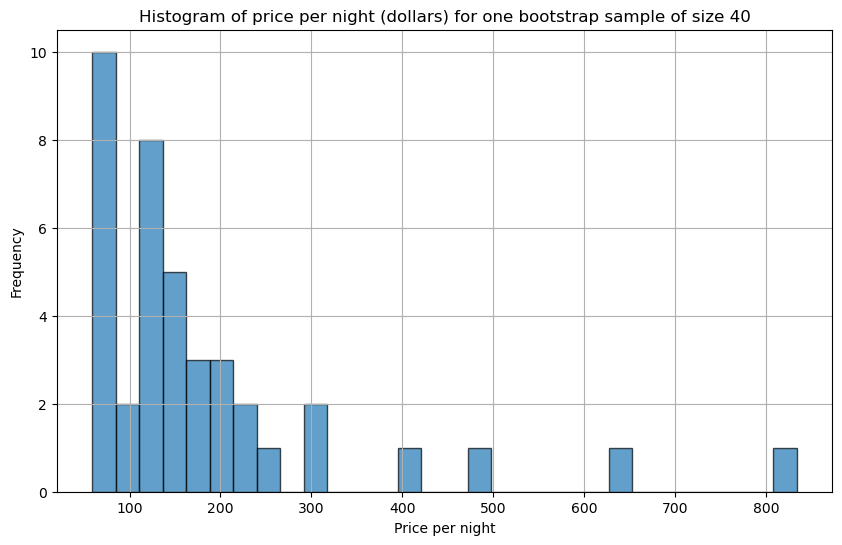

In [50]:
boot1 = one_sample.sample(frac=1, replace=True)
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of price per night (dollars) for one bootstrap sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')
plt.grid(True)



In [53]:
#generate bootstrap samples
bootstrap_samples = []
for i in range(20_000):
    bootstrap_sample = one_sample.sample(frac=1, replace=True)
    bootstrap_samples.append(bootstrap_sample['price'].mean())

bootstrap_samples = pd.Series(bootstrap_samples)
bootstrap_samples


0        234.750
1        287.100
2        243.000
3        189.700
4        190.350
          ...   
19995    259.425
19996    256.700
19997    206.750
19998    231.175
19999    176.450
Length: 20000, dtype: float64

(array([1.000e+00, 1.200e+01, 4.300e+01, 1.080e+02, 2.750e+02, 4.450e+02,
        7.940e+02, 1.227e+03, 1.644e+03, 1.973e+03, 2.091e+03, 2.217e+03,
        2.136e+03, 1.847e+03, 1.544e+03, 1.175e+03, 8.300e+02, 6.240e+02,
        4.140e+02, 2.430e+02, 1.680e+02, 8.500e+01, 4.900e+01, 3.100e+01,
        1.100e+01, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([131.3       , 138.80666667, 146.31333333, 153.82      ,
        161.32666667, 168.83333333, 176.34      , 183.84666667,
        191.35333333, 198.86      , 206.36666667, 213.87333333,
        221.38      , 228.88666667, 236.39333333, 243.9       ,
        251.40666667, 258.91333333, 266.42      , 273.92666667,
        281.43333333, 288.94      , 296.44666667, 303.95333333,
        311.46      , 318.96666667, 326.47333333, 333.98      ,
        341.48666667, 348.99333333, 356.5       ]),
 <BarContainer object of 30 artists>)

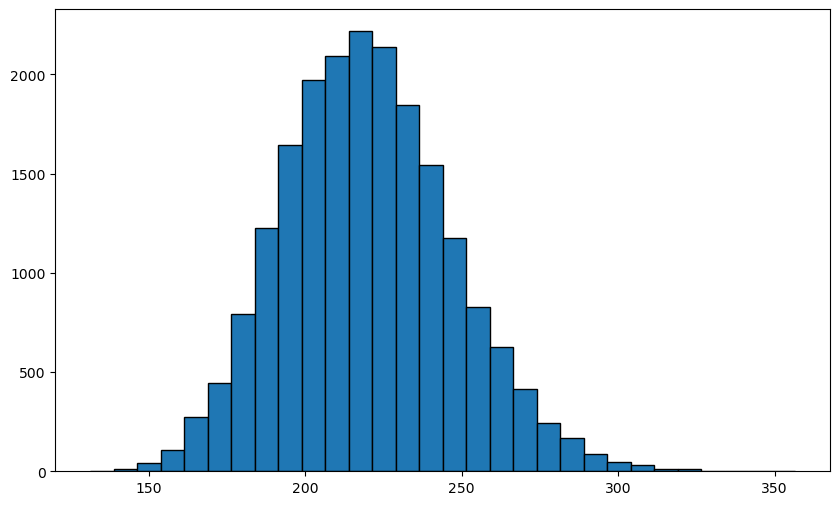

In [51]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_samples, bins=30, edgecolor='black')
